# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The business problem I am facing relates to predicting the salaries of a set of new job postings. I aim to train a machine learning model on data related to existing job postings and their salaries, and generalise that to accurately predict salaries for new postings.

In [31]:
#import your libraries
import pandas as pd
import numpy as np

#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


__author__ = "Taimur Shabbir"
__email__ = "alitaimurshabbir@hotmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe

data_features = pd.read_csv('/Users/alitaimurshabbir/Desktop/salary-prediction/data/train_features.csv')
data_outcomes = pd.read_csv('/Users/alitaimurshabbir/Desktop/salary-prediction/data/train_salaries.csv')
data_combined = pd.merge(data_features, data_outcomes, on = 'jobId')

In [3]:
# checking whether 'merge' was executed successfully by examining number of rows

print(len(data_features))
print(len(data_outcomes))
print(len(data_combined))

1000000
1000000
1000000


### ---- 3 Clean the data ----

In [4]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# As a first step, I will find what data is missing. We see that no data is missing

data_combined.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [5]:
# checking for potentially incorrect data among numerical variables

data_combined.describe()

data_combined[data_combined['salary'] == 0]

# There are records for salaries with a value of 0. These must be incorrect

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


The best way to deal with this missing data is to drop the relevant rows, for two reasons.

- First, the missing component is the outcome variable, salary, so we cannot use the traditional methods of data replacement we would use with missing values of features


- Second, we have 1 million rows in our table. Dropping 5 rows is going to be a trivial loss of data.

In [6]:
data_combined = data_combined.drop(data_combined[data_combined.salary == 0].index)

Next I want to check the unique values for a few columns with the 'object' data type. This is to see, for example, if there are misspellings for entries in the 'jobType' column.

In [7]:
data_combined['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

In [8]:
data_combined['degree'].value_counts()

HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64

In [9]:
data_combined['major'].value_counts()

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64

There are no misspellings for the values in any of the columns investigated.

In [10]:
len(data_combined)


999995

### ---- 4 Explore the data (EDA) ----

In [11]:
data_combined

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [12]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

**Investigate 'salary' distribution:**

<Figure size 1100x800 with 0 Axes>

(array([4.0500e+02, 2.5950e+03, 6.4850e+03, 1.1825e+04, 1.7960e+04,
        2.4639e+04, 3.2252e+04, 4.0125e+04, 4.8653e+04, 5.6440e+04,
        7.3105e+04, 6.9428e+04, 7.2090e+04, 7.1795e+04, 6.9195e+04,
        6.5467e+04, 5.9296e+04, 5.3047e+04, 4.5676e+04, 3.8922e+04,
        3.6434e+04, 2.5615e+04, 2.0507e+04, 1.5739e+04, 1.2202e+04,
        9.0670e+03, 6.6290e+03, 4.8050e+03, 3.3240e+03, 2.3170e+03,
        1.7230e+03, 9.2000e+02, 5.8700e+02, 3.2800e+02, 1.8900e+02,
        1.0600e+02, 5.8000e+01, 2.8000e+01, 1.2000e+01, 5.0000e+00]),
 array([ 17. ,  24.1,  31.2,  38.3,  45.4,  52.5,  59.6,  66.7,  73.8,
         80.9,  88. ,  95.1, 102.2, 109.3, 116.4, 123.5, 130.6, 137.7,
        144.8, 151.9, 159. , 166.1, 173.2, 180.3, 187.4, 194.5, 201.6,
        208.7, 215.8, 222.9, 230. , 237.1, 244.2, 251.3, 258.4, 265.5,
        272.6, 279.7, 286.8, 293.9, 301. ]),
 <a list of 40 Patch objects>)

Text(0.5,1,'Distribution of Salary in Arbitrary Units')

Text(0.5,0,'Salary (Arbitrary Units)')

Text(0,0.5,'Frequency')

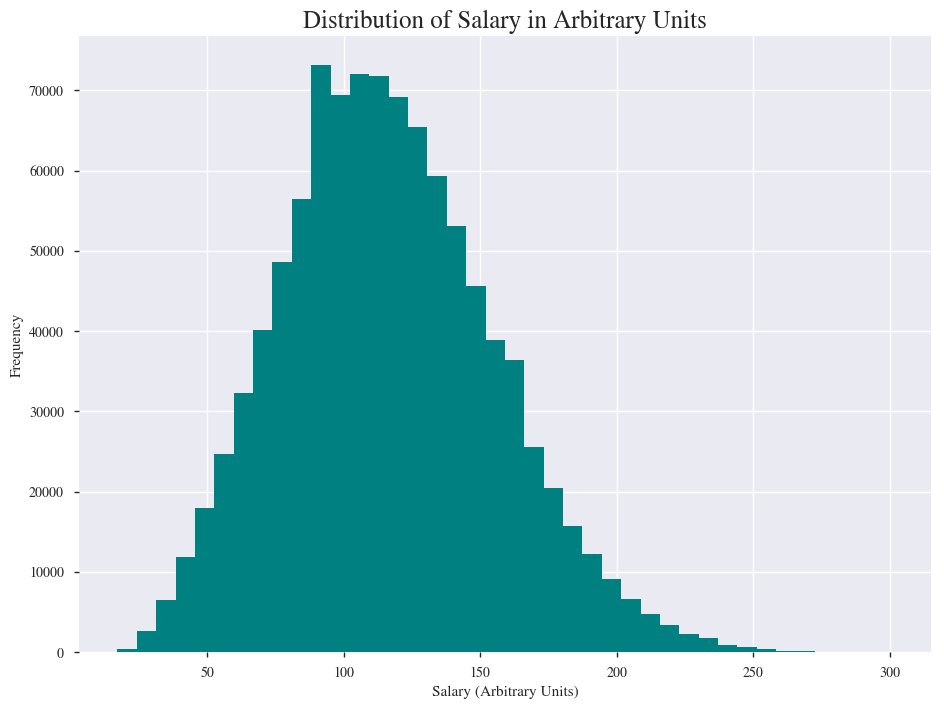

In [32]:
plt.figure(figsize = (11,8))

plt.hist(data_combined['salary'], bins = 40, color = 'teal')

plt.title('Distribution of Salary in Arbitrary Units', fontsize = 18)
plt.xlabel('Salary (Arbitrary Units)')
plt.ylabel('Frequency')


**Investigate numerical variables 'yearsExperience' and 'milesFromMetropolis':**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9b7c84f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9b7c8dad0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9b7c84bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9b7f14a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9b7c97b50>],
 'means': []}

Text(0.5,1,'Distribution of Years of Experience')

Text(0.5,0,'Years')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9b7c9f410>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9b7c9ff90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9b7c84ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9b8001a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9b8001c90>],
 'means': []}

Text(0.5,1,'Distribution of Miles From Metropolis')

Text(0.5,0,'Miles')

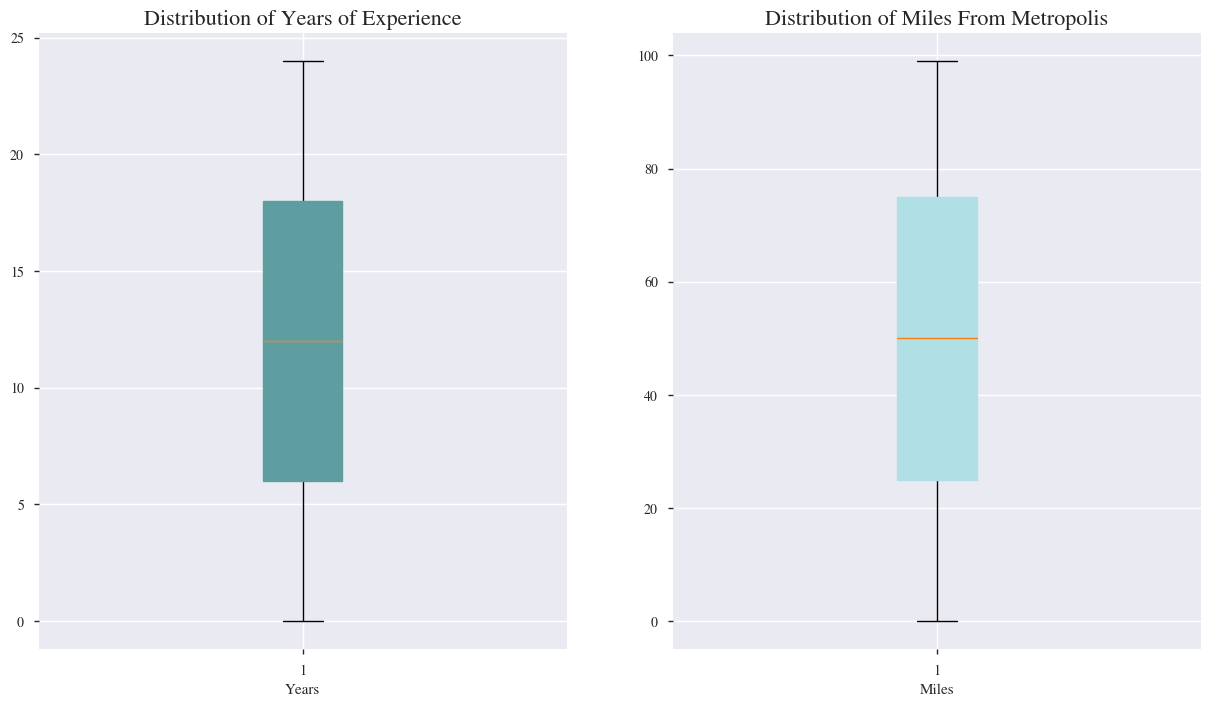

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))

ax1.boxplot(data_combined['yearsExperience'],
            showfliers = True, patch_artist = True,
            boxprops = dict(facecolor = 'cadetblue', color = 'cadetblue'))
            
ax1.set_title('Distribution of Years of Experience', fontsize = 16)
ax1.set_xlabel('Years')



ax2.boxplot(data_combined['milesFromMetropolis'],
            showfliers = True, patch_artist = True, 
            boxprops = dict(facecolor = 'powderblue', color = 'powderblue'))
            
ax2.set_title('Distribution of Miles From Metropolis', fontsize = 16)
ax2.set_xlabel('Miles')

**Interpretation:**

'Salary' is fairly normally distributed with a slight positive skew, which means the mean and the median are greater than the mode. The mean is being 'pulled' up by a few instances with very large values (above 250)

The median of years of work experience required is 12. 50% of the postings require between approximately 6 and 17 years. There are cases where the job posting is aimed at those who are starting their careers, with 0 years of experience, and cases where postings require candidates who have been in the workforce for a long time, approaching 24 years.

On the other hand, there are a few jobs available in Metropolis (0 miles away from this city) and a few who require a long commute (nearly 100 miles). These are extreme points, as the majority of postings lie between 25 and 75 miles.

**Correlations between integer variables**

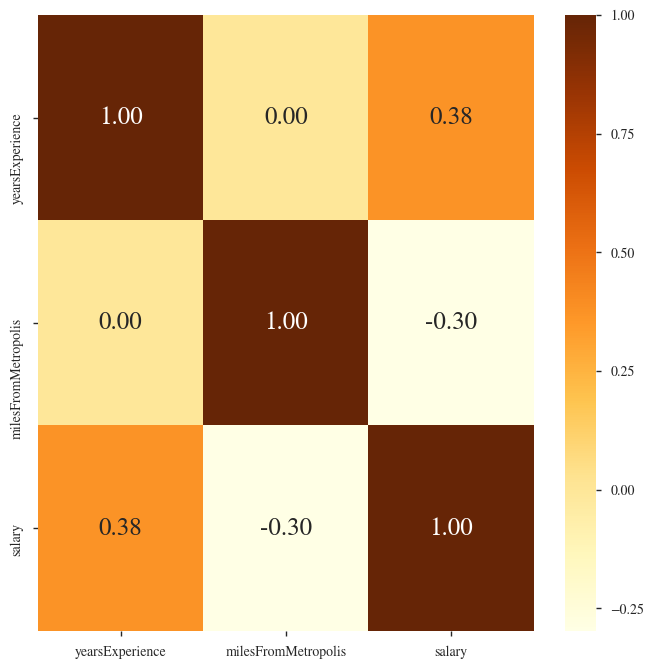

In [35]:
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
sns.heatmap(data_combined.corr(), annot = True, fmt = '.2f', cmap = 'YlOrBr')

Next I want to see the distributions of salary among different types of degrees and industries. 

I will choose 3 values for each variable just to get an idea of the data:

'AUTO', 'OIL' and 'EDUCATION' for industry

In [17]:
# create dataframes

auto_salary_df = data_combined.loc[(data_combined['industry'] == 'AUTO')]

oil_salary_df = data_combined.loc[(data_combined['industry'] == 'OIL')]

education_salary_df = data_combined.loc[(data_combined['industry'] == 'EDUCATION')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9bab80350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9bab80f50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9bab75f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9bab87a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9bab87d10>],
 'means': []}

Text(0.5,0,'Automobile Industry')

Text(0,0.5,'Salary (Arbitrary Units)')

(0, 250)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9bab8eb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9bab8edd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9bab8e810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9bab9ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9bab9aed0>],
 'means': []}

Text(0.5,0,'Oil Industry')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9b9193110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9b9193c50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9bab87c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9b9193f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9b9199d90>],
 'means': []}

Text(0.5,0,'Education Industry')

Text(0.5,1,'Distribution of Salary Among Automobile, Oil and Education Industries')

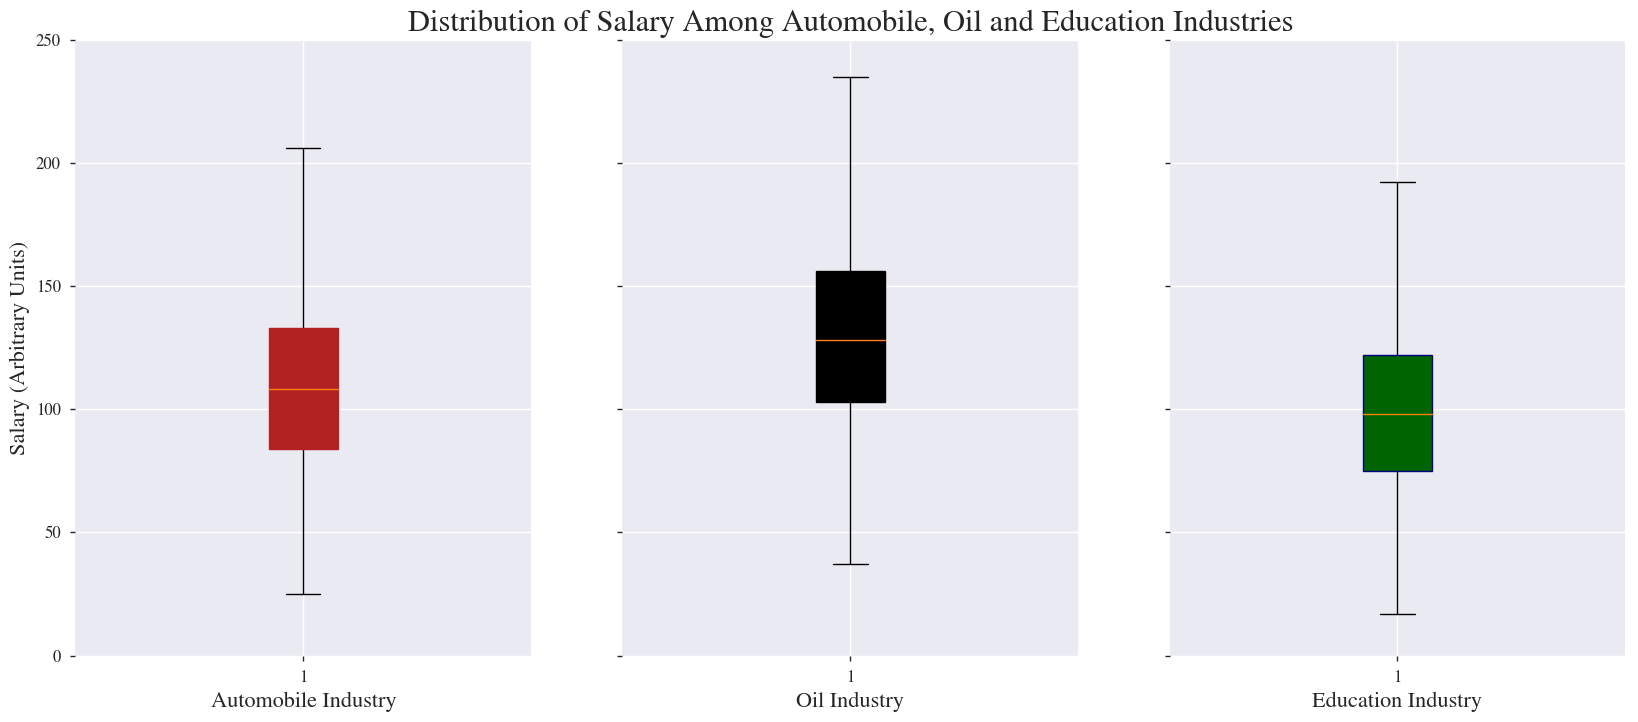

In [36]:
# create plots

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8), sharey = True)



ax1.boxplot(auto_salary_df['salary'], patch_artist = True,
            boxprops=dict(facecolor= 'firebrick', color='firebrick'))

ax1.set_xlabel('Automobile Industry', fontsize = 16)
ax1.set_ylabel('Salary (Arbitrary Units)', fontsize = 16)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1.set_ylim(0, 250)



ax2.boxplot(oil_salary_df['salary'], patch_artist = True,
            boxprops = dict(facecolor = 'black', color = 'black'))

ax2.set_xlabel('Oil Industry', fontsize = 16)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)



ax3.boxplot(education_salary_df['salary'], patch_artist = True,
            boxprops = dict(facecolor = 'darkgreen', color = 'navy'))

ax3.set_xlabel('Education Industry', fontsize = 16)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 12)



ax2.set_title('Distribution of Salary Among Automobile, Oil and Education Industries', fontsize = 22)

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)

**Interpretation**

There are noticeable but small differences among the 3 chosen industry in terms of salary distribution. 

- The highest-paying job postings in the Oil industry earn the most compared to their counterparts in the other two industries. The same can be said for the lowest-paying roles


- The middle 50% of job postings in Oil also pay more than the middle 50% in the Automobile and Education industries


- The salaries offered for jobs in the Automobile industry seem to lie in the middle of the other two industries

This visualisation suggests there may be a link between the type of industry one is in and the salary offered by the job. As a result, the type of industry may have some predictive power in computing new salaries.

What about mean salary per industry?

In [43]:
industry_salary_df = data_combined.groupby('industry').mean().reset_index()

<BarContainer object of 7 artists>

Text(0.5,1,'Average Salary Offered By Industry')

Text(0,0.5,'Salary (Arbitrary Units)')

Text(0.5,0,'Industry')

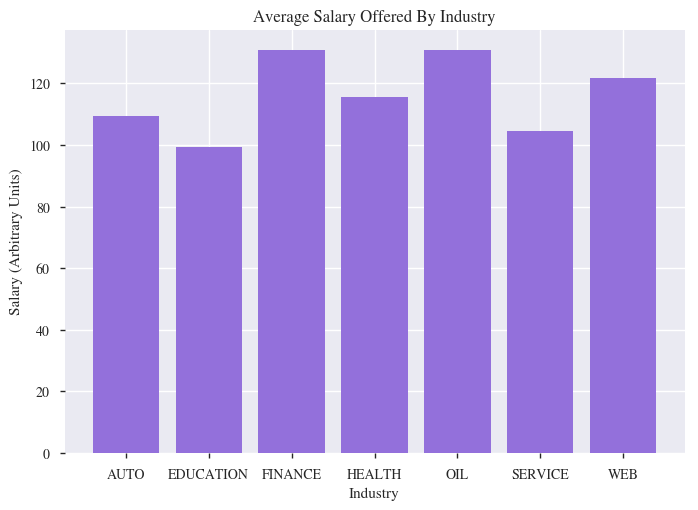

In [47]:
plt.bar(industry_salary_df['industry'], industry_salary_df['salary'], color = 'mediumpurple')
plt.title('Average Salary Offered By Industry')
plt.ylabel('Salary (Arbitrary Units)')
plt.xlabel('Industry')

**Interpretation**

Lorem Ipsum


Next, I would like to find out whether the type of degree required by a job posting is correlated with the salary offered.

I will explore the salaries of jobs where the 'degree' requirement is Doctoral, Bachelor's or no degree

In [19]:
doctoral_salary_df = data_combined.loc[(data_combined['degree'] == 'DOCTORAL')]

bachelors_salary_df = data_combined.loc[data_combined['degree'] == 'BACHELORS']

no_degree_salary_df = data_combined.loc[data_combined['degree'] == 'NONE']

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9ba0cef10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9ba0bab50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9ba0ceb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9ba0bae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9ba0d0c90>],
 'means': []}

Text(0.5,0,'Doctoral Degrees')

Text(0,0.5,'Salary (Arbitrary Units)')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9ba0d36d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9ba0d3f10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9ba0d3250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9ba0d8d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9ba0d8fd0>],
 'means': []}

Text(0.5,0,"Bachelor's Degrees")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9ba0dbd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9ba0dbf90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fe9ba0d3650>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9ce170b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9ce18cb90>],
 'means': []}

Text(0.5,0,'No Degree')

Text(0.5,1,"Distribution of Salary Among Individuals with Doctoral, Bachelor's and No Degrees")

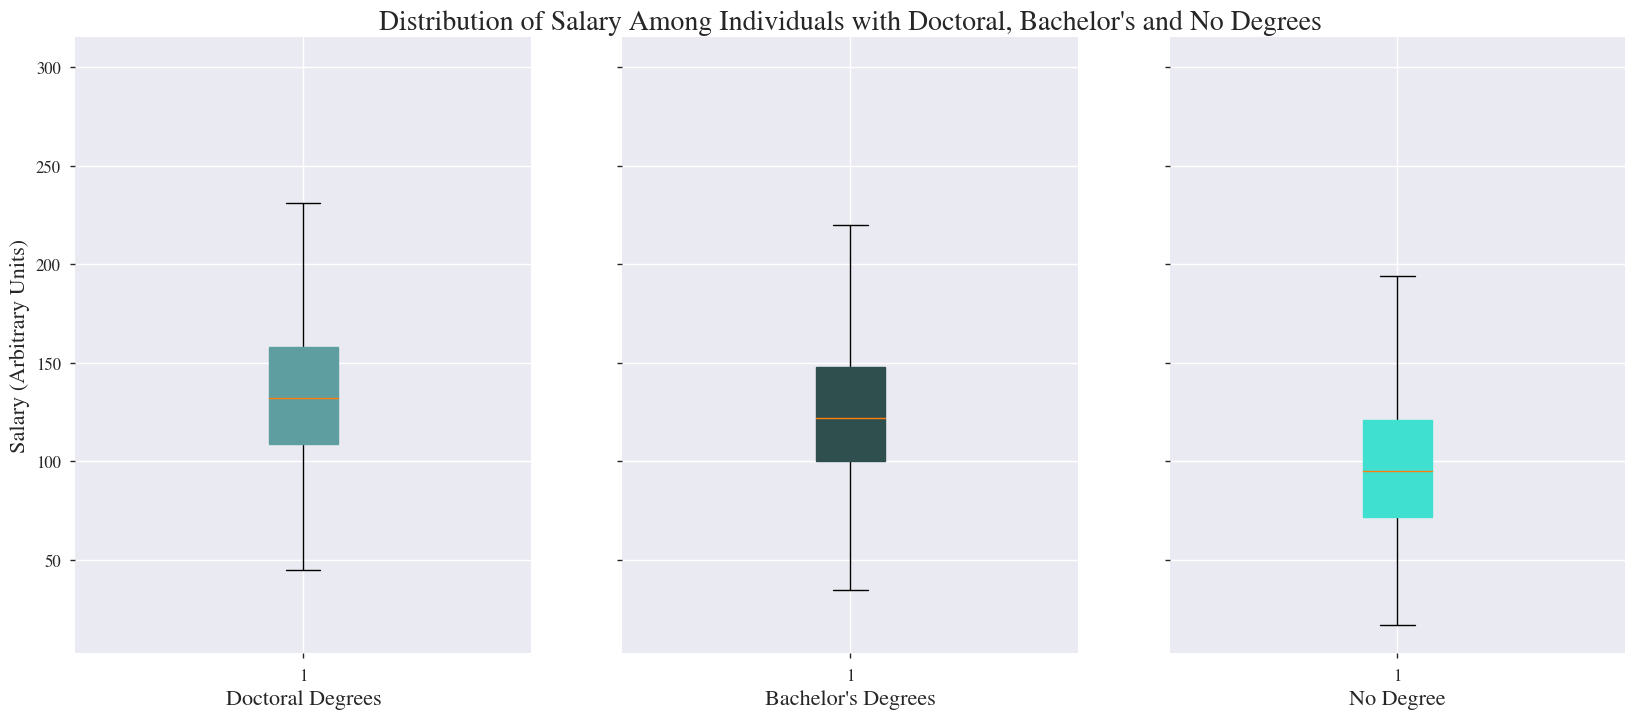

In [53]:
# create plots

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8), sharey = True)

ax1.boxplot(doctoral_salary_df['salary'], patch_artist = True,
            boxprops=dict(facecolor= 'cadetblue', color='cadetblue'))

ax1.set_xlabel('Doctoral Degrees', fontsize = 16)
ax1.set_ylabel('Salary (Arbitrary Units)', fontsize = 16)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)



ax2.boxplot(bachelors_salary_df['salary'], patch_artist = True,
            boxprops = dict(facecolor = 'darkslategrey', color = 'darkslategrey'))

ax2.set_xlabel('Bachelor\'s Degrees', fontsize = 16)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax3.boxplot(no_degree_salary_df['salary'], patch_artist = True,
            boxprops = dict(facecolor = 'turquoise', color = 'turquoise'))

ax3.set_xlabel('No Degree', fontsize = 16)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax2.set_title('Distribution of Salary Among Individuals with Doctoral, Bachelor\'s and No Degrees', fontsize = 20)

As one might expect, jobs that require more advanced degrees tend to offer greater salaries on average

This is certainly not true for all jobs; there are many postings which require no degree but offer a greater salary than postings requiring a Doctoral degree

Nonetheless, the visualisation suggests that the type of degree required for a job also has some predictive power in determing the salary offered

-------
Now let's find whether or not jobs requiring certain majors pay differently. Since technology has in recent decades been a large driver of global economic growth, it is safe to venture that jobs requiring STEM majors may pay more.

I can contrast these with non-STEM majors like Literature to see if any meaningful differences exist

For a quick, visual summary of the data, we can use Pandas Profiling

In [22]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data_combined)
prof

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/opt/anacond

Number of variables,10
Number of observations,999995
Total Missing (%),0.0%
Total size in memory,76.3 MiB
Average record size in memory,80.0 B
Numeric,4
Categorical,5
Boolean,0
Date,0
Text (Unique),1
Rejected,0


### ---- 5 Establish a baseline ----

In [23]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [24]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [25]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [26]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [27]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [28]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [29]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [30]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data